In [25]:
# importing Qiskit
from qiskit import Aer, execute
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister

#importing the Oracle circuit builder
from qiskit.circuit.library import PhaseOracle

# import basic plot tools
from qiskit.visualization import plot_histogram
import numpy as np


In [26]:
def initialize_s(qc, n):
    for q in list(range(n)):
        qc.h(q)
def sudoku_oracle(qc, clause_list, clause_qubits):
    # Compute clauses
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.mct(clause_qubits, output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1
# Multicontrolled z-gate subroutine that applies the gate to the circuit based on the control and target qubits
def multicontrolled_z(qc, control, target):
    qc.h(target)
    qc.mct(control, target)
    qc.h(target)

# Actual diffuser function that applies the diffuser to the circuit
def diffuser(qc):
    for qubit in range(4):
        qc.h(qubit)
        qc.x(qubit)

    multicontrolled_z(qc, list(range(4)), 4)

    for qubit in range(4):
        qc.x(qubit)
        qc.h(qubit)


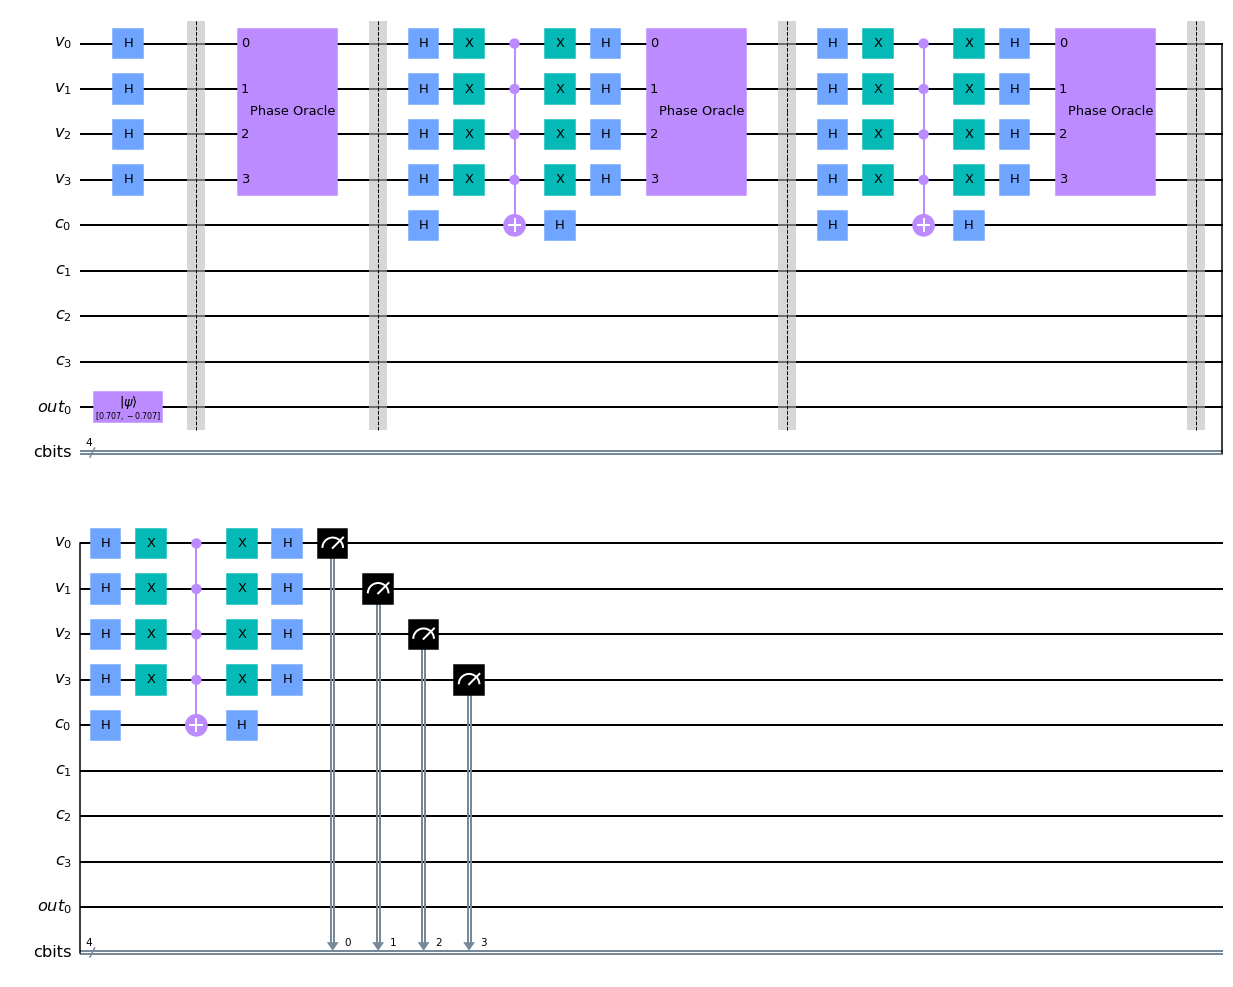

In [27]:
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

# Initialize 'out0' in state |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

expression = '(~x1 & x2 & x3 & ~x4) ^ (x1 & ~x2 & ~x3 & x4)'
# Initialize qubits in state |s>
qc.h(var_qubits)
qc.barrier()  # for visual separation

for i in range(3):
    #qc.barrier(list(range(3)))
    # Apply our oracle
    #sudoku_oracle(qc, clause_list, clause_qubits)
    qc.append(PhaseOracle(expression), list(range(4)))
    qc.barrier()  # for visual separation
    diffuser(qc)

# Measure the variable qubits
qc.measure(var_qubits, cbits)

qc.draw(output='mpl')

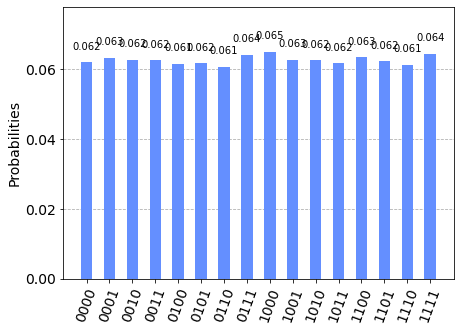

In [28]:
N = 100000  #Since we encounter random outputs due to the nature of the algorithm, we average the outcomes of N shots
simulator = Aer.get_backend('aer_simulator')
results = execute(qc, backend=simulator, shots=N).result()
counts = results.get_counts()
plot_histogram(counts)

array([[<AxesSubplot:title={'center':'1'}>]], dtype=object)

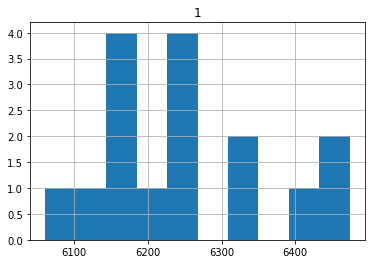

In [29]:
import pandas as pd
df = pd.DataFrame(counts.items())
df = df.sort_values(by=1, ascending=False)

df.hist()

       0     1
14  1000  6474
12  1111  6434
3   0111  6405
10  1100  6326
15  0001  6309
0   1001  6261
5   0010  6250
11  1010  6245
2   0011  6241
8   1101  6217
1   0000  6182
9   0101  6165
4   1011  6164
6   0100  6149
13  1110  6117
7   0110  6061
       0     1
14  1000  6474
12  1111  6434
3   0111  6405
10  1100  6326
15  0001  6309
0   1001  6261
5   0010  6250
11  1010  6245
2   0011  6241
8   1101  6217
1   0000  6182
9   0101  6165
4   1011  6164
6   0100  6149
13  1110  6117
7   0110  6061


array([[<AxesSubplot:title={'center':'1'}>]], dtype=object)

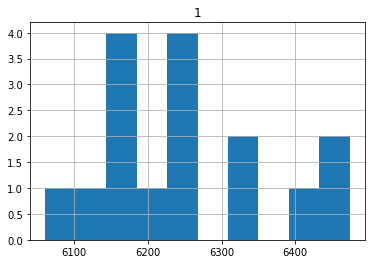

In [30]:
print(df)
df1 = df.copy(deep = True)
df1 = df1[df1[1] > N/1000]
print(df1)
df1.hist()